# Homework Assignment 2

## Section 1: Admissions Dataset

In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
admissions = pd.read_csv('../data/dataset-ucla-admissions.csv')
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


>**Question 1:**

>What is the target / outcome variable? What are the features? Which features are continous or categorical? What is the null accuracy? If there are categorical variables, turn them into dummy variables.

**Target:** admit    **Features:** gre (continuous), gpa (continuous), prestige (categorical)

In [37]:
admissions['prestige'].value_counts()

2.0    150
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

In [38]:
#Null Accuracy
max(admissions['admit'].mean(), 1 - admissions['admit'].mean())

0.6825

In [39]:
#Convert 'prestige' column to dummy variables
prestige_dummies = pd.get_dummies(admissions['prestige'])
admissions = admissions.drop('prestige', axis=1)
admissions = pd.concat([admissions,prestige_dummies],axis=1)
admissions.head()

,admit,gre,gpa,1.0,2.0,3.0,4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


In [40]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
admit    400 non-null int64
gre      398 non-null float64
gpa      398 non-null float64
1.0      400 non-null uint8
2.0      400 non-null uint8
3.0      400 non-null uint8
4.0      400 non-null uint8
dtypes: float64(2), int64(1), uint8(4)
memory usage: 11.0 KB


In [41]:
# Update column headings to strings

admissions.rename(columns={1.0: 'pres_1', 2.0: 'pres_2', 3.0: 'pres_3', 4.0: 'pres_4'}, inplace=True)

In [42]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
admit     400 non-null int64
gre       398 non-null float64
gpa       398 non-null float64
pres_1    400 non-null uint8
pres_2    400 non-null uint8
pres_3    400 non-null uint8
pres_4    400 non-null uint8
dtypes: float64(2), int64(1), uint8(4)
memory usage: 11.0 KB


In [43]:
# Impute null values with mean

admissions = admissions.apply(lambda x: x.fillna(x.mean()),axis=0)

In [44]:
# Confirm no null values remain

admissions[admissions.isnull().any(axis=1)]

,admit,gre,gpa,pres_1,pres_2,pres_3,pres_4


>**Question 2:**

>What do you think is the goal of using machine learning with this dataset?

_In the case of UCLA, the goal would likely be to be to identify **unqualified** potential students that were flagged to be admitted by system. In other words, **reducing false positives or boosting accuracy**._

>**Question 3:** 

>Make a scatter plot of gpa vs gre, color-encoded using the admit feature. What does this graph tell you?

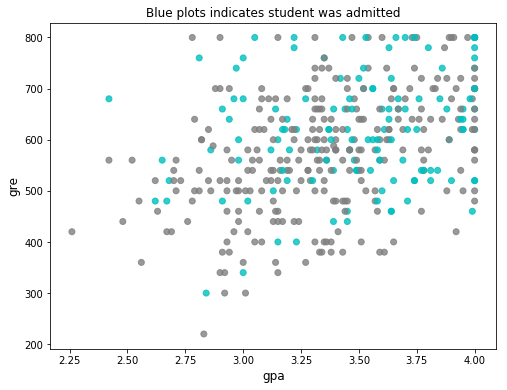

In [45]:
plt.figure(figsize=(8,6))
colors = admissions.admit.map({1: 'c', 0: 'grey'})
plt.scatter('gpa','gre', data=admissions, c=colors, alpha=0.8)
plt.xlabel('gpa', fontsize=12)
plt.ylabel('gre', fontsize=12)
plt.title('Blue plots indicates student was admitted')
#plt.legend() Not quite sure how to generate the legend not using the ax method
plt.show()

>**Question 4:** 

>1. Split the data between a train and test set, with 25% of the data for testing.
>2. Fit a Logistic Regression model on the training data.
>3. Evaluate the model on both the training and testing datasets using the area under the ROC curve.
>4. What's the difference in the AUC score of the training and testing datasets? Is this evidence of overfitting?

In [46]:
# 1. split data into training and testing sets, with 25% for testing

from sklearn.cross_validation import train_test_split

X = admissions[['gre','gpa','pres_1','pres_2','pres_3','pres_4']]
y = admissions['admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [47]:
# 2. Fit a Logistic Regression model on the training data.

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(0.5,1,u'ROC Curve using Training dataset')

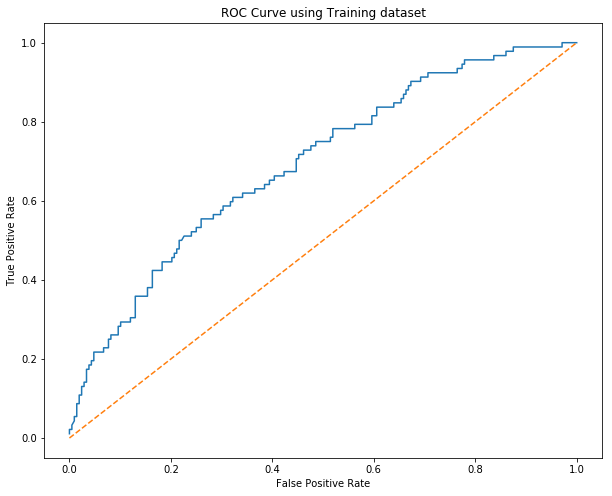

In [48]:
# 3. Evaluate the model on both the training and testing datasets using the area under the ROC curve.

from sklearn.metrics import roc_auc_score, roc_curve

# Training set
y_prob = lr.predict_proba(X_train)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_prob)

# Plot ROC curve
plt.figure(figsize=(10,8))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve using Training dataset')

Text(0.5,1,u'ROC Curve using Test dataset')

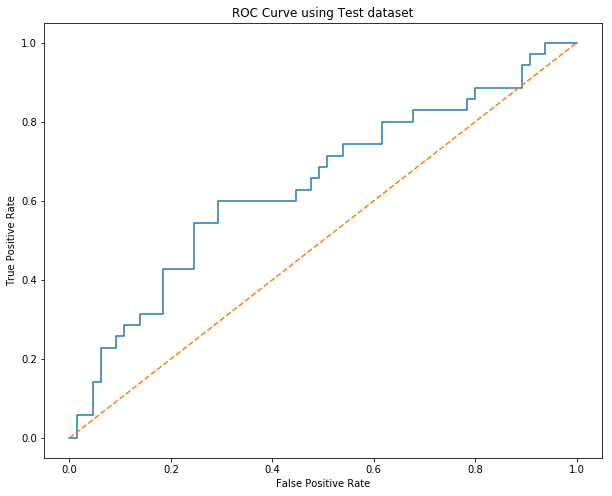

In [49]:
# Test set
y_prob = lr.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(10,8))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve using Test dataset')

In [50]:
from sklearn.model_selection import cross_val_score

print 'Training ROC AUC Score:', cross_val_score(lr, X_train, y_train, scoring='roc_auc', cv=5).mean()
print 'Test ROC AUC Score:', cross_val_score(lr, X_test, y_test, scoring='roc_auc', cv=5).mean()

Training ROC AUC Score: 0.672523109943
Test ROC AUC Score: 0.613186813187


4. What's the difference in the AUC score of the training and testing datasets? Is this evidence of overfitting?

The model AUC score was 6% lower using the test data. This difference seems resonable to not indicate overfitting.

>**Question 5:** 

>Build a KNN model and a Random Forest model trained on this dataset. What's the cross validation score for each? Use roc_auc as your evaluation metric.

In [51]:
# KNN model

from sklearn import neighbors

cls = neighbors.KNeighborsClassifier(n_neighbors=2, weights='uniform')
cls.fit(X_train, y_train)

print(cross_val_score(cls, X_test, y_test, scoring='roc_auc', cv=5).mean() * 100)

66.7032967033


In [52]:
#Apply RFC

from sklearn import ensemble

rfc = ensemble.RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

print(cross_val_score(rfc, X_test, y_test, scoring='roc_auc', cv=5).mean() * 100)

64.2857142857


KNN is the higher performing model with a 66.7% cross val score, followed by RFC with 65.6%, then Logistic with 61.3% 

>**Question 6:** 

> What do false positives and false negatives represent in the context of this model? If you work in an admissions department, would you rather have a model that minimizes false negatives or minimizes false positives? Why?

False positives represent a student that was predicted to be admitted but was not. In the case of UCLA's admission department, it is likely more concerned with minimizing false positives, since it likely uses such a system to reduce the number of
applications it manually reviews to make admission decisions for.

>**Question 7:** 

>Using the Logistic Regression model from Question 4, what is the probability of admission of the following prospective students:

>- Student 1: $GRE = 560$, $GPA = 3.6$, $Prestige = 2$
>- Student 2: $GRE = 750$, $GPA = 3.8$, $Prestige = 4$
>- Student 3: $GRE = 660$, $GPA = 3.1$, $Prestige = 1$

In [53]:
# Create a new df for these records
admissions_test_df = pd.DataFrame({'student': ['1','2','3'], 'gre': [560, 750, 660], 'gpa': [3.6, 3.8, 3.1], 'pres_1': [0,0,1],
                                   'pres_2': [1,0,0], 'pres_3': [0,0,0], 'pres_4': [0,1,0]})
admissions_test_df.head()

,gpa,gre,pres_1,pres_2,pres_3,pres_4,student
0,3.6,560,0,1,0,0,1
1,3.8,750,0,0,0,1,2
2,3.1,660,1,0,0,0,3


In [54]:
X = admissions_test_df[['gre','gpa','pres_1','pres_2','pres_3','pres_4']]
lr.predict_proba(X)[:, 1]

array([ 0.36291325,  0.20236469,  0.51535215])

## Section 2: Mystery Dataset

In this section you will work with a "mystery" supervised classification dataset meaning that you have no context to work with — the names of the features come from San Francisco neighborhoods but aren't actually related to anything having to do with San Francisco.

In this section, we want to devise the best possible model with the fewest number of features. Some of the features are informative, while others are junk. Your task is to find the good ones while dropping the bad ones.

I want you to thoroughly test at least three algorithms in order to find the best one with the best parameters.

In [55]:
data = pd.read_csv('../data/homework_2_data.csv', index_col=[0])
data.head()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
0,-3.126509,7.807749,0.959736,-2.248569,4.557675,1.110156,0.617296,0.356864,0.860267,-0.395962,-1.144975,-1.805742,1.498388,2.157730,1
1,0.941629,2.935495,-0.584966,-0.880963,-1.262072,0.120989,3.970787,2.509629,1.400017,0.574335,-3.389879,-0.898020,0.512079,4.340694,1
2,-0.724688,4.192606,-1.139602,0.856972,0.906893,-2.799484,0.584498,3.468955,1.011336,0.839612,-1.384781,-0.241726,1.502255,-1.539356,1
3,-2.641034,6.963189,0.962412,-0.838858,1.549620,-2.335671,-0.838585,1.924333,2.794306,-0.421610,-1.273275,0.833424,2.268457,-0.004678,0
4,1.259116,4.741797,1.084332,0.186698,4.794145,-1.093006,2.161358,3.264167,-0.060052,1.154145,-2.030773,-1.442986,0.588193,0.533464,1


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 15 columns):
haight          4000 non-null float64
mission         4000 non-null float64
soma            4000 non-null float64
sunset          4000 non-null float64
richmond        4000 non-null float64
glen_park       4000 non-null float64
castro          4000 non-null float64
potrero         4000 non-null float64
hayes_valley    4000 non-null float64
fillmore        4000 non-null float64
bernal          4000 non-null float64
marina          4000 non-null float64
north_beach     4000 non-null float64
excelsior       4000 non-null float64
target          4000 non-null int64
dtypes: float64(14), int64(1)
memory usage: 500.0 KB


In [57]:
data.describe()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.267225,0.913052,-0.021879,-0.007041,0.488571,0.000533,0.214764,0.473963,0.276314,-0.001805,0.719916,0.016530,0.301720,-0.686948,0.361750
std,1.937676,3.021233,1.000251,1.010572,1.709379,1.699261,1.899664,1.760681,1.797701,0.982354,1.800790,0.991669,1.821065,3.675909,0.480567
min,-6.937360,-12.397333,-4.303971,-3.754228,-6.185402,-6.502010,-8.197095,-5.768151,-5.999394,-3.689324,-6.220787,-3.169294,-5.589536,-13.042620,0.000000
25%,-1.559472,-1.004986,-0.693617,-0.663096,-0.631218,-1.125261,-0.965050,-0.747362,-0.907813,-0.674620,-0.506630,-0.650516,-0.921863,-3.161465,0.000000
50%,-0.272602,1.030225,0.001604,-0.018837,0.538179,0.047370,0.299145,0.495901,0.300742,0.004425,0.717371,0.013667,0.263889,-0.721604,0.000000
75%,0.947680,2.990420,0.645886,0.673647,1.594229,1.132822,1.461197,1.666650,1.480998,0.651688,1.946477,0.661317,1.512332,1.515665,1.000000
max,6.680262,12.031816,3.424344,4.113957,7.032764,6.458744,7.532350,6.954996,6.621243,3.880595,7.368307,3.135799,7.445434,13.432946,1.000000


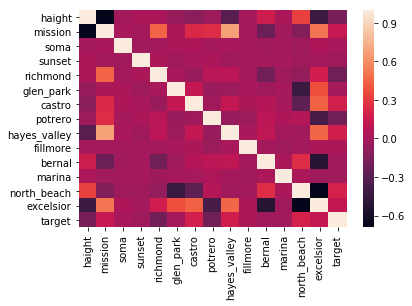

In [59]:
sns.heatmap(data.corr())

In [60]:
data.corr()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
haight,1.000000,-0.691099,-0.003451,0.017411,0.023025,-0.055019,-0.106320,-0.034309,-0.299097,0.006428,0.164962,0.028713,0.324309,-0.423019,-0.171926
mission,-0.691099,1.000000,0.013116,-0.006411,0.448394,0.023159,0.229411,0.248336,0.672682,-0.004066,-0.223609,-0.013775,-0.132077,0.508043,0.136988
soma,-0.003451,0.013116,1.000000,-0.017127,-0.008683,0.023943,0.033782,0.008518,0.011988,-0.003719,-0.015025,-0.003473,-0.021821,0.030777,0.010718
sunset,0.017411,-0.006411,-0.017127,1.000000,0.028527,-0.017834,0.011205,0.017100,-0.018217,0.000801,-0.007153,0.004034,-0.024942,-0.000102,-0.026396
richmond,0.023025,0.448394,-0.008683,0.028527,1.000000,0.011149,-0.038702,0.076728,0.091362,-0.007679,-0.202575,-0.023585,-0.067719,0.170600,-0.196710
glen_park,-0.055019,0.023159,0.023943,-0.017834,0.011149,1.000000,0.119650,-0.043640,-0.034043,0.010605,-0.019650,0.006034,-0.432634,0.374960,0.005610
castro,-0.106320,0.229411,0.033782,0.011205,-0.038702,0.119650,1.000000,-0.019393,0.118713,0.016342,0.063033,0.006320,-0.278914,0.441421,0.187220
potrero,-0.034309,0.248336,0.008518,0.017100,0.076728,-0.043640,-0.019393,1.000000,-0.044419,-0.035553,0.093639,0.033770,0.060056,-0.368261,-0.199197
hayes_valley,-0.299097,0.672682,0.011988,-0.018217,0.091362,-0.034043,0.118713,-0.044419,1.000000,0.015605,0.105327,0.001810,-0.011746,0.453605,0.176853
fillmore,0.006428,-0.004066,-0.003719,0.000801,-0.007679,0.010605,0.016342,-0.035553,0.015605,1.000000,-0.003304,-0.019405,-0.006632,0.026074,0.028804


In [61]:
#Assign target and parameters

y = data.target
X = data.columns
X = data.drop('target', axis=1)

#split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [67]:
def evaluate_models(X, y):
    
    cls = ensemble.RandomForestClassifier(n_estimators=50) 
    cls.fit(X, y)

    print 'Random Forest:', cross_val_score(cls, X, y, scoring='roc_auc', cv=5).mean()
    
    cls = LogisticRegression() 
    cls.fit(X, y)

    print 'Logistic Regression:', cross_val_score(cls, X, y, scoring='roc_auc', cv=5).mean()
    
    cls = ensemble.GradientBoostingClassifier(n_estimators=50) 
    cls.fit(X, y)

    print 'GBDT:', cross_val_score(cls, X, y, scoring='roc_auc', cv=5).mean()
    
    cls = neighbors.KNeighborsClassifier(n_neighbors=5)
    cls.fit(X, y)

    print 'KNN:', cross_val_score(cls, X, y, scoring='roc_auc', cv=5).mean()

In [68]:
evaluate_models(X_train, y_train)

Random Forest: 0.950857736887
Logistic Regression: 0.822400815861
GBDT: 0.927713547834
KNN: 0.940102416165


In [69]:
evaluate_models(X_test, y_test)

Random Forest: 0.923252747253
Logistic Regression: 0.831758241758
GBDT: 0.916395604396
KNN: 0.934384615385


In [71]:
X_train2 = X_train[['mission','sunset','fillmore','marina']]
X_test2 = X_test[['mission','sunset','fillmore','marina']]

In [84]:
#evaluate performance on data sets with reduced parameters
print 'Training set 2 evaluation: ', evaluate_models(X_train2, y_train)
print 'Test set 2 evaluation: ' , evaluate_models(X_test2, y_test)

 Training set 2 evaluation:  Random Forest: 0.555844250256
Logistic Regression: 0.579679407086
GBDT: 0.580456620718
KNN: 0.540443744509
None
Test set 2 evaluation:  Random Forest: 0.588714285714
Logistic Regression: 0.591648351648
GBDT: 0.615824175824
KNN: 0.556197802198
None
